Завдання на практичну роботу "Deep Learning Classification":

Завдання:

Створення власного набору даних для класифікації:

Бінарна класифікація: Створіть набір даних, де кожен запис представляє два числові атрибути та бінарний класовий лейбл (наприклад, "0" або "1"). Ці дані можуть бути синтетичними та містити, наприклад, оцінки студентів та їхній успіх (пройшов/не пройшов).
Мультикласова класифікація: Розширте набір даних для включення більше ніж двох класів (наприклад, "низький", "середній", "високий").
Побудова нейронної мережі для класифікації:

Розробіть нейронну мережу з трьома повнозв'язними шарами для класифікації. Використовуйте відповідні функції активації (наприклад, ReLU для прихованих шарів та sigmoid для виходу в бінарній класифікації або softmax для мультикласової).
Навчіть модель на вашому власному наборі даних для класифікації (50 епох) та оцініть її ефективність.
Експерименти з покращенням результатів:

Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.
Збільште кількість нейронів у кожному шарі.
Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.
Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.
Візуалізація процесу навчання:

Здійсніть візуалізацію зміни функції втрат та точності на тренувальному та тестувальному наборах даних під час тренування моделі.

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Функція для генерації синтетичних даних з двома атрибутами
def generate_binary_classification_data(num_samples, features_range, grades_range, random_seed):
    np.random.seed(random_seed)

    # Генерація випадкових атрибутів в межах вказаного діапазону для кожного атрибута
    feature_1 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)))
    feature_2 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)))

    # Присвоєння класових міток на основі умови позитивного діапазону
    labels = np.where((feature_1 >= grades_range[0]) & (feature_1 <= grades_range[1]) &
                      (feature_2 >= grades_range[0]) & (feature_2 <= grades_range[1]), 1, 0)

    # Створення DataFrame
    df = pd.DataFrame({'Labs': feature_1, 'Practices': feature_2, 'Target': labels})

    return df

# Генерація синтетичних даних та запис у CSV файл
binary_data = generate_binary_classification_data(num_samples=200, features_range=(1, 100), grades_range=(60, 100), random_seed=13)
binary_data.to_csv('binary_classification.csv', index=False)



# Розділення даних на тренувальний та тестовий набори
X = binary_data.drop('Target', axis=1)
y = binary_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Стандартизація атрибутів
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Побудова моделі для бінарної класифікації
binary_model = Sequential([
  Dense(10, activation='relu', input_shape=(X.shape[1],)),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Компіляція моделі
binary_model.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])

# Тренування моделі
binary_history = binary_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

# Оцінка моделі на тестовому наборі
binary_test_loss, binary_test_accuracy = binary_model.evaluate(X_test_scaled, y_test)
print(f"Помилка моделі на тестовому наборі: {binary_test_loss}")
print(f"Точність моделі на тестовому наборі: {100*binary_test_accuracy:.2f}%")


Epoch 1/50
5/5 [==============================] - 1s 72ms/step - loss: 0.8877 - accuracy: 0.1250 - val_loss: 0.8515 - val_accuracy: 0.2500
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 0.8590 - accuracy: 0.1250 - val_loss: 0.8280 - val_accuracy: 0.2500
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 0.8315 - accuracy: 0.1937 - val_loss: 0.8052 - val_accuracy: 0.3000
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 0.8045 - accuracy: 0.3125 - val_loss: 0.7834 - val_accuracy: 0.3500
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 0.7788 - accuracy: 0.3875 - val_loss: 0.7629 - val_accuracy: 0.4000
Epoch 6/50
5/5 [==============================] - 0s 16ms/step - loss: 0.7541 - accuracy: 0.4313 - val_loss: 0.7438 - val_accuracy: 0.4250
Epoch 7/50
5/5 [==============================] - 0s 16ms/step - loss: 0.7319 - accuracy: 0.4500 - val_loss: 0.7255 - val_accuracy: 0.3500
Epoch 8/50
5/5 [===========

Експерименти з покращенням результатів:

Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.
Збільште кількість нейронів у кожному шарі.
Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.
Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.

In [3]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Покращена модель для бінарної класифікації
improved_binary_model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компіляція моделі
improved_binary_model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) 

# Створення callback для регулювання швидкості навчання (learning rate)
def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor = 0.9
    decay_step = 10
    lr = initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / decay_step))
    return lr

# Створення об'єкта LearningRateScheduler
lr_improved_binary_scheduler = LearningRateScheduler(lr_schedule)

# Тренування покращеної моделі (використовуючи callback для регулювання швидкості навчання)
improved_binary_history = improved_binary_model.fit(X_train_scaled, 
                      y_train, 
                      epochs=300,
                      validation_data=(X_test_scaled, y_test),
                      callbacks=[lr_improved_binary_scheduler])

# Оцінка результатів на тестовому наборі для покращеної моделі
improved_binary_loss, improved_binary_accuracy = improved_binary_model.evaluate(X_test_scaled, y_test)
print(f"\nПомилка моделі на тестовому наборі: {improved_binary_loss}")
print(f"Точність моделі на тестовому наборі: {100*improved_binary_accuracy:.2f}%")

# Отримання точності оригінальної та покращеної моделей
binary_model_accuracy = binary_history.history['accuracy'][-1]  # Або 'val_accuracy' для точності на валідаційному наборі
improved_binary_model_accuracy = improved_binary_history.history['accuracy'][-1]

# Створення DataFrame для порівняння результатів
binary_model_results = [["binary_model", binary_model_accuracy],
                 ["improved_binary_model", improved_binary_model_accuracy]]
all_binary_results = pd.DataFrame(binary_model_results, columns=["model", "accuracy"])
print("\n", all_binary_results)


Epoch 1/300
5/5 [==============================] - 2s 71ms/step - loss: 0.6446 - accuracy: 0.8562 - val_loss: 0.6380 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/300
5/5 [==============================] - 0s 14ms/step - loss: 0.5805 - accuracy: 0.8750 - val_loss: 0.6013 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/300
5/5 [==============================] - 0s 14ms/step - loss: 0.5258 - accuracy: 0.8750 - val_loss: 0.5684 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/300
5/5 [==============================] - 0s 16ms/step - loss: 0.4805 - accuracy: 0.8750 - val_loss: 0.5364 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/300
5/5 [==============================] - 0s 14ms/step - loss: 0.4340 - accuracy: 0.8750 - val_loss: 0.5041 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/300
5/5 [==============================] - 0s 15ms/step - loss: 0.3897 - accuracy: 0.8750 - val_loss: 0.4735 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/300
5/5 [==============================] - 0s 15ms/step - loss: 0.3482 - a

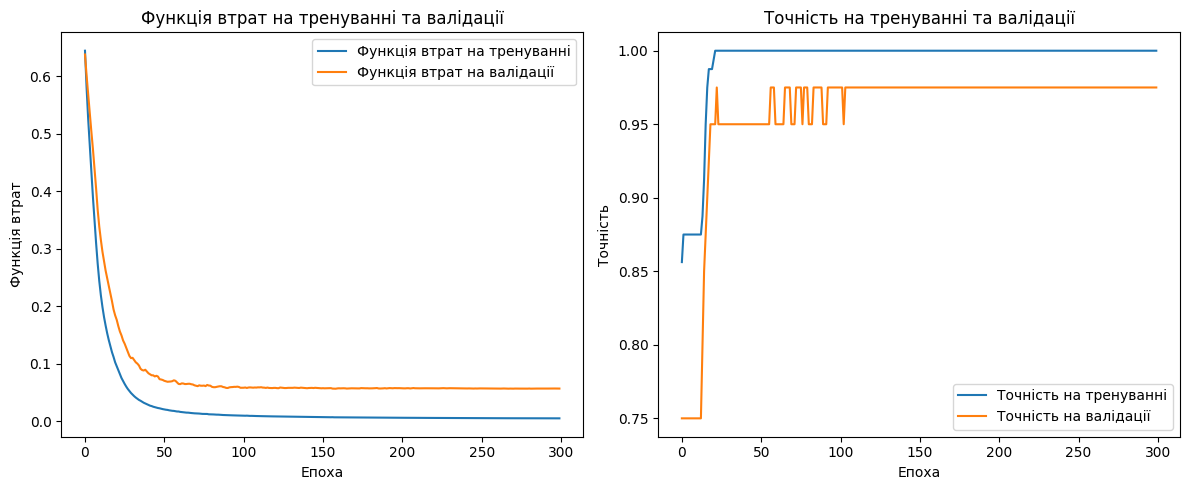

In [5]:
import matplotlib.pyplot as plt

# Видобування значень функції втрат для тренування та валідації
train_loss = improved_binary_history.history['loss']
val_loss = improved_binary_history.history['val_loss']

# Видобування значень точності для тренування та валідації
train_accuracy = improved_binary_history.history['accuracy']
val_accuracy = improved_binary_history.history['val_accuracy']

# Побудова графіка функції втрат
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Функція втрат на тренуванні')
plt.plot(val_loss, label='Функція втрат на валідації')
plt.title('Функція втрат на тренуванні та валідації')
plt.xlabel('Епоха')
plt.ylabel('Функція втрат')
plt.legend()

# Побудова графіка точності
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Точність на тренуванні')
plt.plot(val_accuracy, label='Точність на валідації')
plt.title('Точність на тренуванні та валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.tight_layout()
plt.show()


Для мультикласової


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Визначення функції для генерації синтетичних даних з двома ознаками
def generate_classification_data(num_samples, features_range, random_seed):
    np.random.seed(random_seed)

    # Генерація випадкових ознак у вказаному діапазоні для кожної ознаки
    feature_1 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)), 1)
    feature_2 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)), 1)

     # Визначення умов та відповідних значень
    conditions = [
        (feature_1 < 36) | (feature_2 < 36),
        (feature_1 >= 36) & (feature_1 < 60) & (feature_2 >= 36) & (feature_2 < 60),
        (feature_1 >= 60) & (feature_2 >= 60)
    ]
    values = ['Low', 'Medium', 'High']

    # Привласнення класових міток на основі умов
    labels = np.select(conditions, values, default='Low')

    # Створення DataFrame
    df = pd.DataFrame({'Feature1': feature_1, 'Feature2': feature_2, 'Target': labels})

    return df

# Генерація даних для багатокласової класифікації
multiclass_data = generate_classification_data(num_samples=1000, features_range=(1, 100), random_seed=13)

# Збереження даних у CSV-файл
multiclass_data.to_csv('multiclass_classification.csv', index=False)



X = multiclass_data.drop('Target', axis=1)
y = multiclass_data['Target']

# Кодування міток класів
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=33)

# Стандартизація ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Створення багатокласової моделі
multiclass_model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  #3 output neurons for 'Low', 'Medium', 'High'
])

# Компіляція моделі
multiclass_model.compile(loss='sparse_categorical_crossentropy',  #Different loss function for multiclass classifcation
                 optimizer='adam',
                 metrics=["accuracy"])

# Навчання моделі
multiclass_history = multiclass_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

# Оцінка моделі на тестовому наборі
multiclass_test_loss, multiclass_test_acc = multiclass_model.evaluate(X_test_scaled, y_test)
print(f"Model loss on the test set: {multiclass_test_loss}")
print(f"Model accuracy on the test set: {100*multiclass_test_acc:.2f}%")




Epoch 1/50


25/25 [==============================] - 2s 20ms/step - loss: 0.7744 - accuracy: 0.7412 - val_loss: 0.6983 - val_accuracy: 0.7800
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6451 - accuracy: 0.7975 - val_loss: 0.5858 - val_accuracy: 0.7800
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5490 - accuracy: 0.7987 - val_loss: 0.5073 - val_accuracy: 0.7800
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4777 - accuracy: 0.8037 - val_loss: 0.4533 - val_accuracy: 0.8200
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4231 - accuracy: 0.8250 - val_loss: 0.4117 - val_accuracy: 0.8400
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3807 - accuracy: 0.8475 - val_loss: 0.3785 - val_accuracy: 0.8600
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8687 - val_loss: 0.3495 - val_accuracy: 0.8900
Epoch 8/50
25/

Експерименти з покращенням результатів:

Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.
Збільште кількість нейронів у кожному шарі.
Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.
Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
import math
import pandas as pd

# Побудова моделі для багатокласової класифікації
improved_multiclass_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Використання softmax для отримання ймовірностей для кількох класів
])

# Компіляція моделі з використанням відповідної функції втрат для багатокласової класифікації
improved_multiclass_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=["accuracy"])

# Створення змінної для визначення швидкості навчання за допомогою LearningRateScheduler
def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor = 0.9
    decay_step = 10
    lr = initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / decay_step))
    return lr

# Використання LearningRateScheduler для зміни швидкості навчання під час тренування
lr_multiclass_scheduler = LearningRateScheduler(lr_schedule)

# Тренування моделі з використанням шедулера швидкості навчання
improved_multiclass_history = improved_multiclass_model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_test_scaled, y_test), callbacks=[lr_multiclass_scheduler])

# Визначення точності для порівняння з попередньою моделлю
multiclass_model_accuracy = multiclass_history.history['accuracy'][-1]  # Або 'val_accuracy' для точності на валідації
improved_multiclass_model_accuracy = improved_multiclass_history.history['accuracy'][-1]

# Збір результатів та їх виведення
multiclass_model_results = [["multiclass_model", multiclass_model_accuracy],
                 ["improved_multiclass_model", improved_multiclass_model_accuracy]]
all_multiclass_results = pd.DataFrame(multiclass_model_results, columns=["model", "accuracy"])
print("\n", all_multiclass_results)


Epoch 1/300
25/25 [==============================] - 2s 16ms/step - loss: 1.0128 - accuracy: 0.7138 - val_loss: 0.8852 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 2/300
25/25 [==============================] - 0s 5ms/step - loss: 0.7312 - accuracy: 0.9337 - val_loss: 0.5402 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 3/300
25/25 [==============================] - 0s 6ms/step - loss: 0.3903 - accuracy: 0.9463 - val_loss: 0.2648 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 4/300
25/25 [==============================] - 0s 5ms/step - loss: 0.2195 - accuracy: 0.9413 - val_loss: 0.1982 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 5/300
25/25 [==============================] - 0s 5ms/step - loss: 0.1771 - accuracy: 0.9525 - val_loss: 0.1789 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 6/300
25/25 [==============================] - 0s 5ms/step - loss: 0.1638 - accuracy: 0.9475 - val_loss: 0.1678 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 7/300
25/25 [==============================] - 0s 5ms/step - loss: 0.

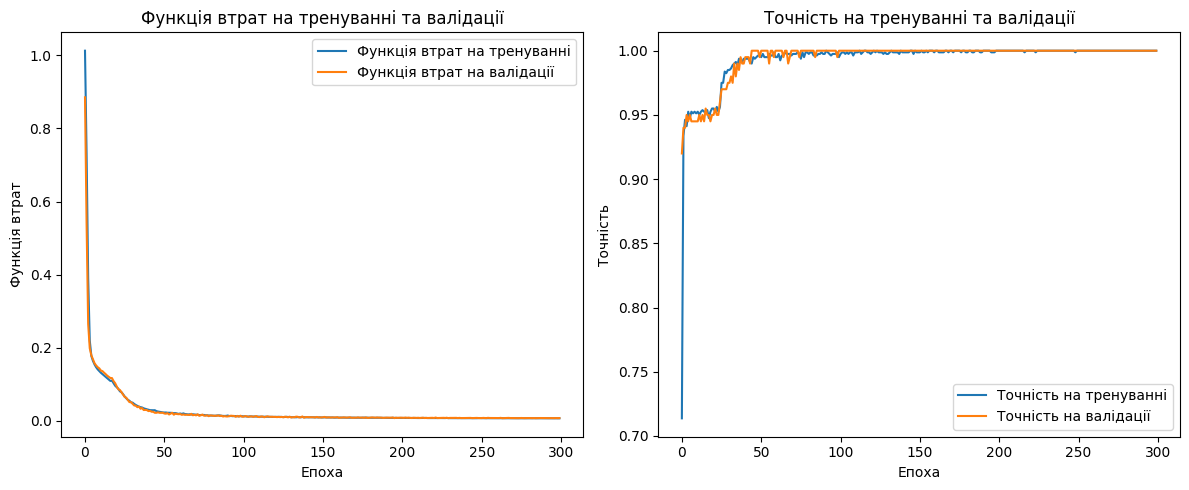

In [8]:
import matplotlib.pyplot as plt

# Видобування значень функції втрат для тренування та валідації
train_loss = improved_multiclass_history.history['loss']
val_loss = improved_multiclass_history.history['val_loss']

# Видобування значень точності для тренування та валідації
train_accuracy = improved_multiclass_history.history['accuracy']
val_accuracy = improved_multiclass_history.history['val_accuracy']

# Побудова графіка функції втрат
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Функція втрат на тренуванні')
plt.plot(val_loss, label='Функція втрат на валідації')
plt.title('Функція втрат на тренуванні та валідації')
plt.xlabel('Епоха')
plt.ylabel('Функція втрат')
plt.legend()

# Побудова графіка точності
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Точність на тренуванні')
plt.plot(val_accuracy, label='Точність на валідації')
plt.title('Точність на тренуванні та валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.tight_layout()
plt.show()
